<a href="https://colab.research.google.com/github/BaltiAhmed/TradingBot-LSTM/blob/main/LSTM_Scalping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# --- Import des librairies ---
%pip install pandas numpy matplotlib seaborn plotly tensorflow python-binance backtrader


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Étape 1 – Chargement des données

In [4]:
# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (optionnel si tu veux de l’interactif)
import plotly.express as px


In [6]:

import pandas as pd

# --- Charger ton fichier CSV (upload depuis ton PC vers Colab) ---
# from google.colab import files
# uploaded = files.upload()   # choisis "klines_BTCUSDT_1m_mainnet_last365days.csv"

# --- Lire le fichier CSV ---
df = pd.read_csv("klines_BTCUSDT_1m_mainnet_last365days.csv")

# --- Conversion de la date ---
df['open_time_utc'] = pd.to_datetime(df['open_time_utc'])

# --- Sélection des colonnes essentielles ---
df = df[['open_time_utc', 'open', 'high', 'low', 'close', 'volume']]

# --- Mettre l’horodatage comme index ---
df.set_index('open_time_utc', inplace=True)

# --- Conversion en float ---
df = df.astype(float)

# --- Aperçu ---
print("Shape:", df.shape)
print(df.head())
print(df.info())


Shape: (525600, 5)
                               open      high       low     close    volume
open_time_utc                                                              
2024-10-13 16:11:00+00:00  62279.25  62279.26  62272.54  62278.65   3.11370
2024-10-13 16:12:00+00:00  62278.64  62278.65  62278.62  62278.62   0.90092
2024-10-13 16:13:00+00:00  62278.63  62278.63  62278.62  62278.62   3.46890
2024-10-13 16:14:00+00:00  62278.62  62278.63  62274.64  62278.00   3.01594
2024-10-13 16:15:00+00:00  62278.00  62324.50  62278.00  62324.49  12.46947
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2024-10-13 16:11:00+00:00 to 2025-10-13 16:10:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    525600 non-null  float64
 1   high    525600 non-null  float64
 2   low     525600 non-null  float64
 3   close   525600 non-null  float64
 4   volume  525600 non-null  float64
dtypes: float64(5)
memory u

# Étape 2 – Exploration & Indicateurs techniques

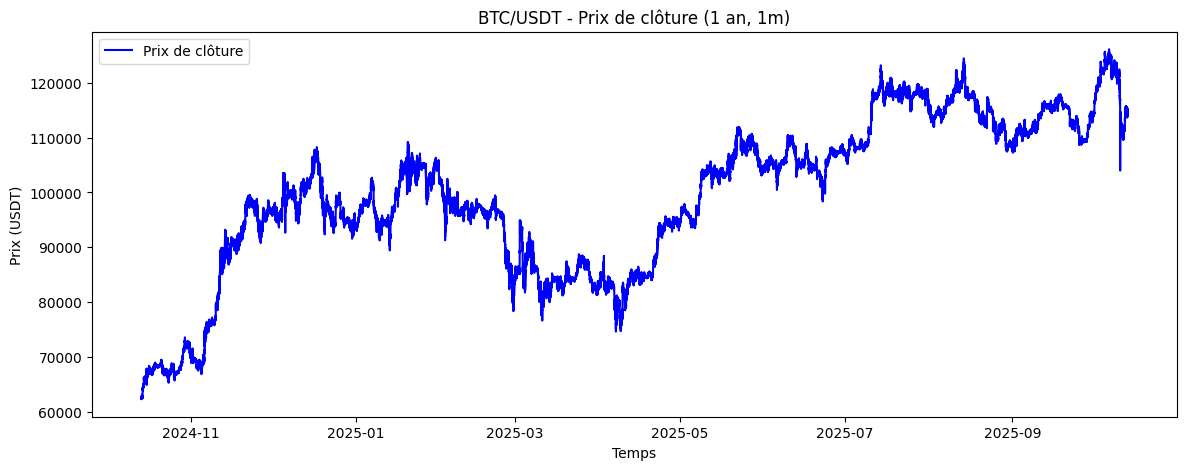

In [7]:
import matplotlib.pyplot as plt

# --- Tracer le prix de clôture sur 1 an ---
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue")
plt.title("BTC/USDT - Prix de clôture (1 an, 1m)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()


In [9]:
import numpy as np
import pandas as pd

# SMA (Simple Moving Average)
df["SMA_20"] = df["close"].rolling(window=20).mean()

# EMA (Exponential Moving Average)
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()

# RSI (Relative Strength Index, 14 périodes)
delta = df["close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
df["RSI_14"] = 100 - (100 / (1 + rs))

# Bandes de Bollinger (20 périodes)
df["BB_middle"] = df["close"].rolling(window=20).mean()
df["BB_std"] = df["close"].rolling(window=20).std()
df["BB_upper"] = df["BB_middle"] + 2*df["BB_std"]
df["BB_lower"] = df["BB_middle"] - 2*df["BB_std"]

# Vérification
print(df.tail(5))


                                open       high        low      close  \
open_time_utc                                                           
2025-10-13 16:06:00+00:00  114594.53  114694.91  114575.68  114635.76   
2025-10-13 16:07:00+00:00  114635.77  114721.15  114634.09  114708.21   
2025-10-13 16:08:00+00:00  114708.21  114974.01  114691.00  114903.41   
2025-10-13 16:09:00+00:00  114903.41  115034.71  114903.40  114956.07   
2025-10-13 16:10:00+00:00  114956.07  115034.69  114954.79  114985.55   

                             volume       SMA_20         EMA_20  RSI_14  \
open_time_utc                                                             
2025-10-13 16:06:00+00:00  28.23227  114448.1730  114446.182652     NaN   
2025-10-13 16:07:00+00:00  27.27103  114462.8255  114471.137637     NaN   
2025-10-13 16:08:00+00:00  38.14020  114489.4310  114512.306434     NaN   
2025-10-13 16:09:00+00:00  31.08170  114510.6745  114554.569631     NaN   
2025-10-13 16:10:00+00:00  12.98936  1

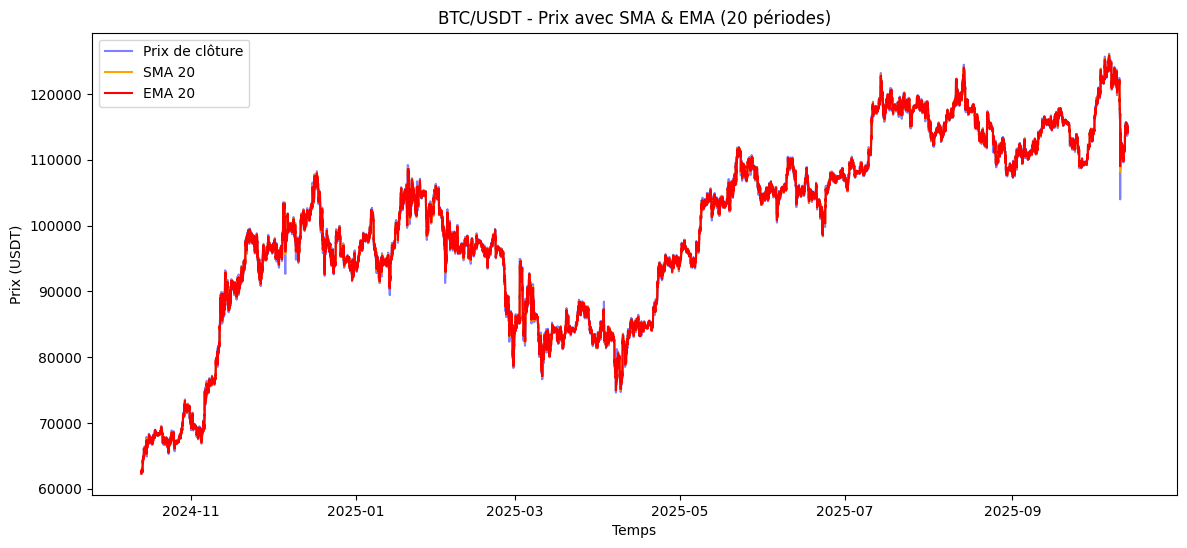

In [10]:
# --- Visualisation SMA & EMA sur les prix ---
plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue", alpha=0.5)
plt.plot(df.index, df['SMA_20'], label="SMA 20", color="orange")
plt.plot(df.index, df['EMA_20'], label="EMA 20", color="red")
plt.title("BTC/USDT - Prix avec SMA & EMA (20 périodes)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()

In [11]:
%pip install ta


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29437 sha256=973321215a193cef0f27a3f3e68b7c65768a3f40c76eed7dd7b8b3681144eeac
  Stored in directory: c:\users\ahmed\appdata\local\pip\cache\wheels\61\d8\66\8018676d483fa5edb5337a7a25ee8c029ac255be25f90f3cd5
Successfully built ta


You should consider upgrading via the 'c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


                               close     RSI_14
open_time_utc                                  
2025-10-13 15:51:00+00:00  114578.58  62.005459
2025-10-13 15:52:00+00:00  114458.36  54.700395
2025-10-13 15:53:00+00:00  114380.50  50.546924
2025-10-13 15:54:00+00:00  114359.89  49.475988
2025-10-13 15:55:00+00:00  114332.43  48.016285
2025-10-13 15:56:00+00:00  114336.25  48.245039
2025-10-13 15:57:00+00:00  114407.67  52.457407
2025-10-13 15:58:00+00:00  114383.99  50.975960
2025-10-13 15:59:00+00:00  114312.10  46.667106
2025-10-13 16:00:00+00:00  114282.32  44.971313
2025-10-13 16:01:00+00:00  114424.66  53.642338
2025-10-13 16:02:00+00:00  114421.42  53.435934
2025-10-13 16:03:00+00:00  114519.38  58.620192
2025-10-13 16:04:00+00:00  114602.67  62.448379
2025-10-13 16:05:00+00:00  114594.53  61.846189
2025-10-13 16:06:00+00:00  114635.76  63.752794
2025-10-13 16:07:00+00:00  114708.21  66.884388
2025-10-13 16:08:00+00:00  114903.41  73.521882
2025-10-13 16:09:00+00:00  114956.07  74

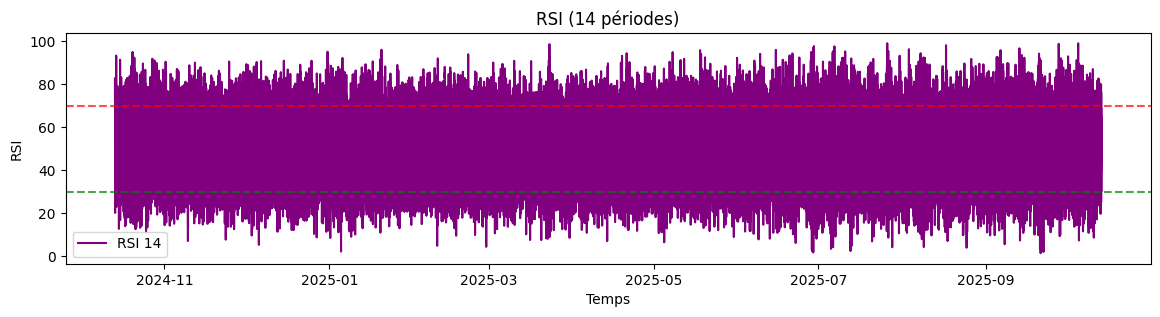

In [12]:
import ta

# RSI avec la librairie ta
df["RSI_14"] = ta.momentum.RSIIndicator(df["close"], window=14).rsi()

# Vérification rapide
print(df[["close", "RSI_14"]].tail(20))

# Nouveau tracé
plt.figure(figsize=(14,3))
plt.plot(df.index, df['RSI_14'], label="RSI 14", color="purple")
plt.axhline(70, linestyle="--", color="red", alpha=0.7)   # Surachat
plt.axhline(30, linestyle="--", color="green", alpha=0.7) # Survente
plt.title("RSI (14 périodes)")
plt.xlabel("Temps")
plt.ylabel("RSI")
plt.legend()
plt.show()


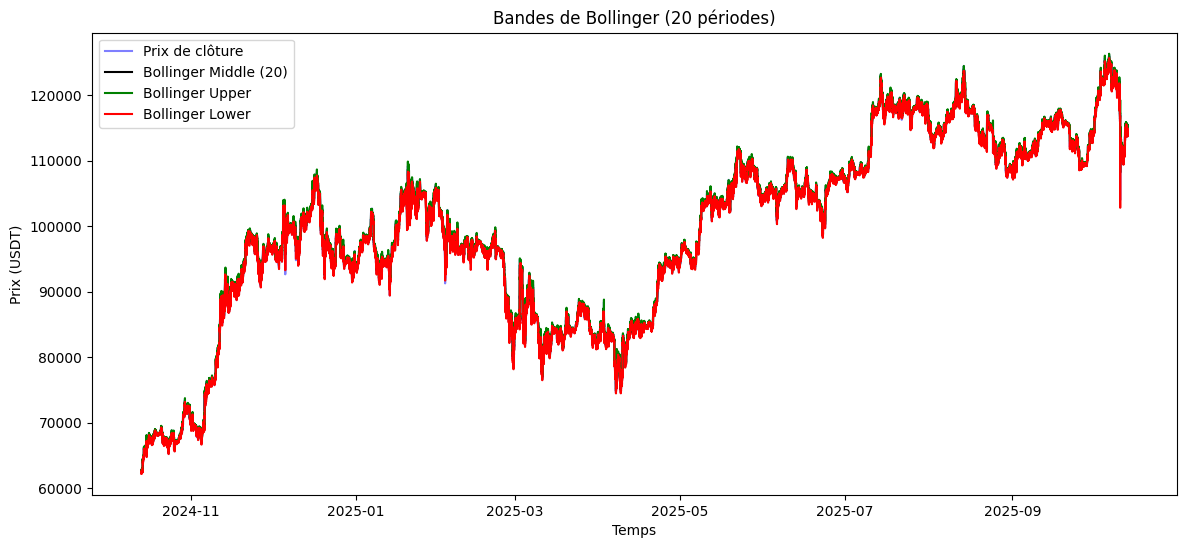

In [13]:
# --- Visualisation Bandes de Bollinger ---
plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue", alpha=0.5)
plt.plot(df.index, df['BB_middle'], label="Bollinger Middle (20)", color="black")
plt.plot(df.index, df['BB_upper'], label="Bollinger Upper", color="green")
plt.plot(df.index, df['BB_lower'], label="Bollinger Lower", color="red")
plt.fill_between(df.index, df['BB_lower'], df['BB_upper'], color="gray", alpha=0.1)
plt.title("Bandes de Bollinger (20 périodes)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sauvegarde en CSV
df.to_csv("/content/drive/MyDrive/BTC_1m_preprocessed.csv")

# Sauvegarde en Pickle (plus rapide à recharger)
df.to_pickle("/content/drive/MyDrive/BTC_1m_preprocessed.pkl")

print("✅ Dataset sauvegardé dans Google Drive !")


ModuleNotFoundError: No module named 'google.colab'

In [15]:
import pandas as pd
df = pd.read_pickle("/content/drive/MyDrive/BTC_1m_preprocessed.pkl")
print(df.shape)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BTC_1m_preprocessed.pkl'

# Étape 3 – Prétraitement

In [16]:
# Création des df_features,on garde uniquement les colonnes utiles pour l'entraînement
features = ["close", "volume", "SMA_20", "EMA_20", "RSI_14", "BB_upper", "BB_lower"]
df_features = df[features].dropna().copy()  # dropna car indicateurs techniques au début sont NaN

print("Shape après sélection :", df_features.shape)
df_features.head()


Shape après sélection : (525581, 7)


,close,volume,SMA_20,EMA_20,RSI_14,BB_upper,BB_lower
open_time_utc,,,,,,,
2024-10-13 16:30:00+00:00,62508.00,6.92102,62402.2955,62415.306840,72.854189,62563.563548,62241.027452
2024-10-13 16:31:00+00:00,62537.06,36.46080,62415.2160,62426.902379,75.707676,62576.179902,62254.252098
2024-10-13 16:32:00+00:00,62590.49,31.23756,62430.8095,62442.482152,79.892724,62596.414552,62265.204448
2024-10-13 16:33:00+00:00,62604.12,25.94874,62447.0845,62457.876233,80.801375,62613.689157,62280.479843
2024-10-13 16:34:00+00:00,62638.00,36.95387,62465.0845,62475.030878,82.873196,62632.558263,62297.610737


In [34]:
#Labeling : définir la logique de Buy/Sell/Hold

horizon = 3  # nombre de minutes à prévoir
threshold = 0.002  # 0.2% mouvement

# On garde uniquement les colonnes utiles pour l'entraînement
features = ["close", "volume", "SMA_20", "EMA_20", "RSI_14", "BB_upper", "BB_lower"]
df_features = df[features].dropna().copy()  # dropna car indicateurs techniques au début sont NaN


df_features["future_close"] = df["close"].shift(-horizon)

df_features["label"] = 0
df_features.loc[(df_features["future_close"] - df_features["close"]) / df_features["close"] > threshold, "label"] = 1
df_features.loc[(df_features["future_close"] - df_features["close"]) / df_features["close"] < -threshold, "label"] = -1

# Remap labels -1, 0, 1 to 0, 1, 2 for sparse_categorical_crossentropy
label_mapping = {-1: 0, 0: 1, 1: 2}
df_features["label"] = df_features["label"].map(label_mapping)


# Supprimer les dernières lignes qui n'ont pas de future_close
df_features = df_features.dropna()

print(df_features["label"].value_counts())
df_features.head(15)

label
1    493148
2     16292
0     16138
Name: count, dtype: int64


,close,volume,SMA_20,EMA_20,RSI_14,BB_upper,BB_lower,future_close,label
open_time_utc,,,,,,,,,
2024-10-13 16:30:00+00:00,62508.00,6.92102,62402.2955,62415.306840,72.854189,62563.563548,62241.027452,62604.12,1
2024-10-13 16:31:00+00:00,62537.06,36.46080,62415.2160,62426.902379,75.707676,62576.179902,62254.252098,62638.00,1
2024-10-13 16:32:00+00:00,62590.49,31.23756,62430.8095,62442.482152,79.892724,62596.414552,62265.204448,62586.00,1
2024-10-13 16:33:00+00:00,62604.12,25.94874,62447.0845,62457.876233,80.801375,62613.689157,62280.479843,62625.99,1
2024-10-13 16:34:00+00:00,62638.00,36.95387,62465.0845,62475.030878,82.873196,62632.558263,62297.610737,62594.01,1
2024-10-13 16:35:00+00:00,62586.00,7.98014,62478.1600,62485.599365,70.328550,62640.160527,62316.159473,62616.00,1
2024-10-13 16:36:00+00:00,62625.99,5.72688,62493.8385,62498.969902,73.633937,62648.844419,62338.832581,62630.95,1
2024-10-13 16:37:00+00:00,62594.01,33.78514,62505.7885,62508.021340,67.187987,62652.350786,62359.226214,62709.99,1
2024-10-13 16:38:00+00:00,62616.00,7.06552,62515.0865,62518.305022,69.185526,62664.972124,62365.200876,62646.68,1


In [35]:
# transformer les données en séquences pour LSTM.
import numpy as np

# Paramètres
seq_len = 20  # taille de la fenêtre temporelle
features = ["close", "volume", "SMA_20", "EMA_20", "RSI_14", "BB_upper", "BB_lower"]

# On convertit en numpy pour accélérer
data = df_features[features].values
labels = df_features["label"].values

X, y = [], []

for i in range(len(data) - seq_len):
    X.append(data[i:i+seq_len])   # séquence de 20 bougies
    y.append(labels[i+seq_len])   # label associé à la fin de la séquence

X = np.array(X)
y = np.array(y)

print("Shape X :", X.shape)  # (nb_samples, 20, nb_features)
print("Shape y :", y.shape)  # (nb_samples,)


Shape X : (525558, 20, 7)
Shape y : (525558,)


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Etape 4 : préparation du dataset pour LSTM.

In [37]:
from sklearn.preprocessing import StandardScaler

# Découpagedes données train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False  # respect de la chronologie
)

print("Shapes après split :")
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)

print("\nRépartition des classes (avant oversampling) :")
print("Train :", np.bincount(y_train))
print("Test  :", np.bincount(y_test))
# ⚠️ Normalisation : on scale seulement sur le TRAIN pour éviter data leakage(toutes les colonnes doivent être sur la même échelle)
scalers = []
X_train_scaled = np.zeros_like(X_train)
X_test_scaled = np.zeros_like(X_test)

for i in range(X_train.shape[2]):  # chaque feature séparément
    scaler = StandardScaler()
    X_train_scaled[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_test_scaled[:, :, i] = scaler.transform(X_test[:, :, i])
    scalers.append(scaler)

print("\n✅ Normalisation terminée")
print("Nouvelle shape train:", X_train_scaled.shape)

Shapes après split :
X_train : (420446, 20, 7) y_train : (420446,)
X_test : (105112, 20, 7) y_test : (105112,)

Répartition des classes (avant oversampling) :
Train : [ 14912 390501  15033]
Test  : [  1226 102627   1259]

✅ Normalisation terminée
Nouvelle shape train: (420446, 20, 7)


In [38]:
X_train_balanced, y_train_balanced = [], []

max_class = np.max(np.bincount(y_train))
target_samples = int(0.5 * max_class)  # Oversampling à mi-chemin

# Séparer par classe
for label in np.unique(y_train):
    X_class = X_train_scaled[y_train == label]
    y_class = y_train[y_train == label]

    # Oversampling limité
    X_res, y_res = resample(
        X_class, y_class,
        replace=True,
        n_samples=target_samples,
        random_state=42
    )
    X_train_balanced.append(X_res)
    y_train_balanced.append(y_res)

# Fusion
X_train_balanced = np.vstack(X_train_balanced)
y_train_balanced = np.hstack(y_train_balanced)

print("\nNouvelle distribution après oversampling :")
print(np.bincount(y_train_balanced))



Nouvelle distribution après oversampling :
[195250 195250 195250]


In [39]:
# ⚖️ Calcul des class weight
from sklearn.utils.class_weight import compute_class_weight

# Vérification existence variables
print("Existence des variables :")
print(" - X_train_balanced :", "X_train_balanced" in globals())
print(" - y_train_balanced :", "y_train_balanced" in globals())
print(" - X_test_scaled :", "X_test_scaled" in globals())
print(" - y_test :", "y_test" in globals())

# Conversion en int
y_train_balanced = np.array(y_train_balanced).astype(int)

# Calcul des poids de classes
classes = np.unique(y_train_balanced)
class_weights_values = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_balanced
)

# Dictionnaire attendu par Keras
class_weights = {int(c): float(w) for c, w in zip(classes, class_weights_values)}

print("\n✅ Class weights calculés :")
print(class_weights)


Existence des variables :
 - X_train_balanced : True
 - y_train_balanced : True
 - X_test_scaled : True
 - y_test : True

✅ Class weights calculés :
{0: 1.0, 1: 1.0, 2: 1.0}


# Construction du modèle Bidirectional LSTM

In [40]:
from tensorflow.keras import backend as K
import tensorflow as tf

def focal_loss(gamma=2., alpha=1.):
    def focal_loss_fixed(y_true, y_pred):
        # S'assure que y_true est en int32 et a la bonne forme
        y_true = tf.reshape(tf.cast(y_true, tf.int32), [-1])
        y_true_onehot = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])

        # Clip pour stabilité numérique
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())

        # Calcul de la focal loss
        cross_entropy = -y_true_onehot * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        loss = K.sum(weight * cross_entropy, axis=1)

        return K.mean(loss)
    return focal_loss_fixed


In [41]:
print("Shape de X_train_balanced :", X_train_balanced.shape)


Shape de X_train_balanced : (585750, 20, 7)


In [42]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras import backend as K


In [44]:
from tensorflow.keras import metrics
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Modèle LSTM
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train_balanced.shape[1], X_train_balanced.shape[2]))),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=focal_loss(gamma=2., alpha=1.),
    metrics=[metrics.SparseCategoricalAccuracy(name="accuracy")]
)

model.build(input_shape=(None, X_train_balanced.shape[1], X_train_balanced.shape[2]))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 20, 128)        │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,275 (305.76 KB)

 Trainable params: 78,275 (305.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Calcul des class weights
#class_weights_values = compute_class_weight(
   # class_weight='balanced',
   # classes=np.unique(y_train_balanced),
   # y=y_train_balanced
#)
##class_weights = dict(enumerate(class_weights_values))

#print(" Class weights calculés :", class_weights)


In [45]:
print("y_train_balanced shape:", y_train_balanced.shape)
print("y_test shape:", y_test.shape)


y_train_balanced shape: (585750,)
y_test shape: (105112,)


In [46]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
18305/18305 ━━━━━━━━━━━━━━━━━━━━ 277s 15ms/step - accuracy: 0.5118 - loss: 0.3950 - val_accuracy: 0.9309 - val_loss: 0.1551
Epoch 2/10
18305/18305 ━━━━━━━━━━━━━━━━━━━━ 267s 15ms/step - accuracy: 0.5251 - loss: 0.3866 - val_accuracy: 0.8979 - val_loss: 0.1602
Epoch 3/10
18305/18305 ━━━━━━━━━━━━━━━━━━━━ 324s 18ms/step - accuracy: 0.5577 - loss: 0.3680 - val_accuracy: 0.8757 - val_loss: 0.1605
Epoch 4/10
18305/18305 ━━━━━━━━━━━━━━━━━━━━ 302s 17ms/step - accuracy: 0.6031 - loss: 0.3318 - val_accuracy: 0.8159 - val_loss: 0.1714
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


# Evaluation

3285/3285 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step
📊 Rapport de classification :
              precision    recall  f1-score   support

        Sell       0.08      0.35      0.13      1226
        Hold       0.98      0.95      0.97    102627
         Buy       0.08      0.05      0.06      1259

    accuracy                           0.93    105112
   macro avg       0.38      0.45      0.39    105112
weighted avg       0.96      0.93      0.95    105112



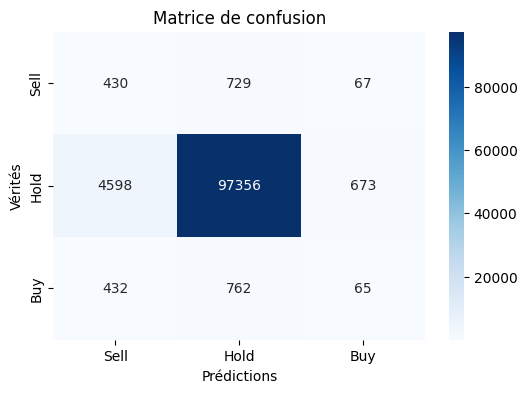

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Évaluation sur le test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_classes, target_names=["Sell", "Hold", "Buy"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Sell","Hold","Buy"],
            yticklabels=["Sell","Hold","Buy"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()
